In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

d:\D_Drive\Github\Thesis\GraphSVX_graph_properties\.venv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == "":
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


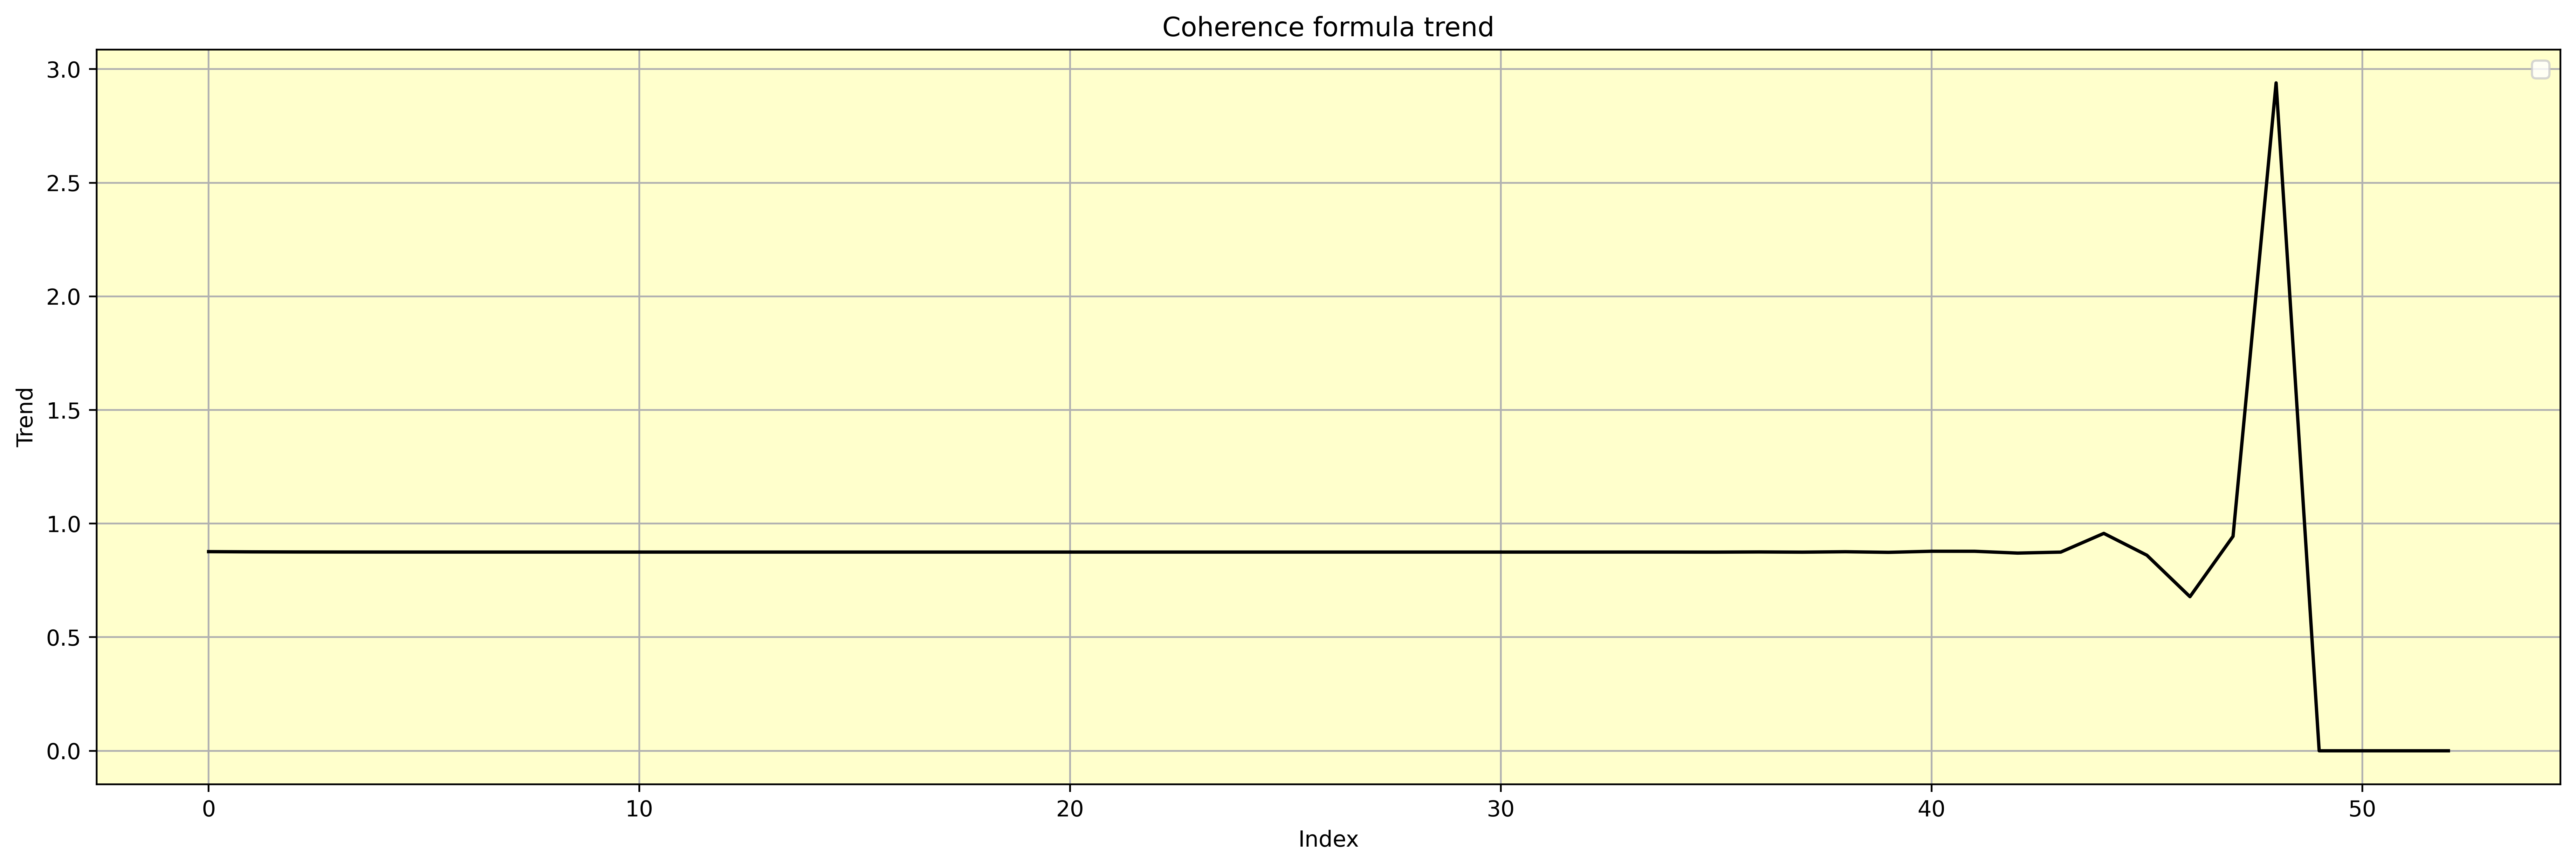

In [10]:
d = 100
A = np.random.rand(d)
e = r.randrange(1,2)/100
B = np.array([x + e for x in list(A)])

x = list(range(5000))
y = [(np.abs((np.linalg.norm(A,2) - np.linalg.norm(B,2)))/(np.linalg.norm(A-B,2)))]
# y = [(1/(np.linalg.norm(A-B,2)))]
for i in range(1,5000):
    e /= 2
    B = np.array([x + e for x in list(A)])
    y.append((np.abs((np.linalg.norm(A,2) - np.linalg.norm(B,2)))/(np.linalg.norm(A-B,2))))
    # y.append(1/(np.linalg.norm(A-B,2)))


plt.figure(figsize=(20,6), dpi = 500)
plt.gca().grid(True)
plt.gca().set_facecolor((1, 1, 0.8))

plt.plot(x,y,color='k')

plt.title('Coherence formula trend', fontsize=12)
plt.legend(prop={'size':10})
plt.ylabel("Trend")
plt.xlabel("Index")
plt.show()